In [8]:
import pandas as pd
import wordcloud
import sys
import matplotlib.pyplot as plt
from collections import Counter

sys.path.append("../src")
import clean_data_utils as utils

pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

In [9]:
filename = '../data/raw/uncleaned_DS_jobs.csv'
try:
    df = utils.load_data(filename)
    print(f'Original Data: {df.shape}')
    cleaned_df = utils.process_data(df)
    print(f'After Cleaning: {cleaned_df.shape}')
    
    df.to_csv("../data/final/cleaned_DS_jobs.csv", index=False)
except FileNotFoundError:
    print(f'File not found {filename}')

Original Data: (672, 15)
After Cleaning: (672, 23)


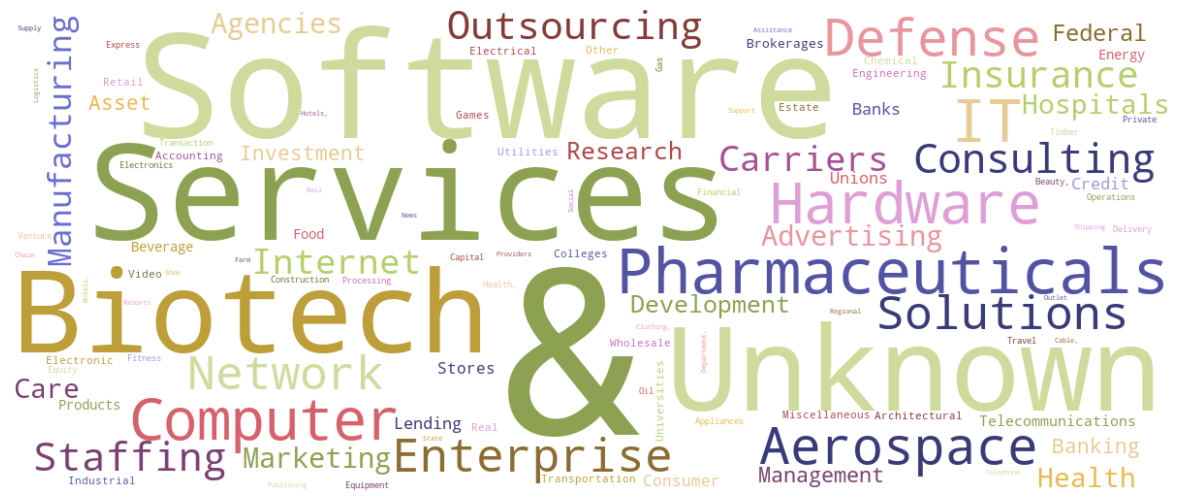

In [10]:
title_words = list(df["Industry"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, stopwords=None, background_color="white", 
                         colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")